In [9]:
import pandas as pd

# Load only the relevant columns
sentiment_df = pd.read_csv("fear_greed_index.csv", usecols=["date", "classification"])
trader_df = pd.read_csv("historical_data.csv")
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [45]:
import pandas as pd

# Load only available relevant columns
trader_df = pd.read_csv("historical_data.csv", usecols=[
    "Account",           # account
    "Coin",              # symbol
    "Execution Price",   # execution price
    "Size Tokens",       # size
    "Side",              # side
    "Timestamp IST",         # time
    "Start Position",    # start position
    "Direction",         # event
    "Closed PnL"         # closedPnL
])


In [47]:
trader_df.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size Tokens        0
Side               0
Timestamp IST      0
Start Position     0
Direction          0
Closed PnL         0
dtype: int64

In [49]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df = trader_df.dropna(subset=['Timestamp IST'])  # optional cleanup
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [51]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
sentiment_df = sentiment_df.dropna(subset=['date'])
sentiment_df['date'] = sentiment_df['date'].dt.date


In [53]:
sentiment_map = dict(zip(sentiment_df['date'], sentiment_df['classification']))
trader_df['sentiment'] = trader_df['date'].map(sentiment_map)


In [55]:
print(trader_df[['date', 'sentiment']].drop_duplicates().head())
print(trader_df['sentiment'].isna().mean())  # ideally much less than 1.0


           date      sentiment
0    2024-02-12          Greed
44   2024-03-12  Extreme Greed
189  2024-04-12  Extreme Greed
190  2025-04-03           Fear
211  2025-05-03            NaN
0.5473146102871568


In [57]:
trader_df.groupby('sentiment')['Closed PnL'].mean()


sentiment
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

In [59]:
trader_df['sentiment'].value_counts()


sentiment
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

In [61]:
trader_df.groupby('sentiment')['Size Tokens'].mean()


sentiment
Extreme Fear      2460.043834
Extreme Greed    16407.310318
Fear              3219.865206
Greed            14956.263148
Neutral          17720.854908
Name: Size Tokens, dtype: float64

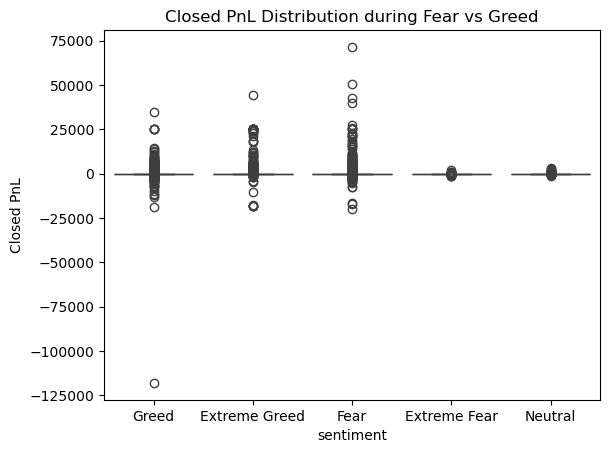

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=trader_df, x='sentiment', y='Closed PnL')
plt.title("Closed PnL Distribution during Fear vs Greed")
plt.show()


In [67]:
#Most Active Coins per Sentiment
trader_df.groupby(['sentiment', 'Coin']).size().unstack().fillna(0)


Coin,@107,@4,@49,@8,AAVE,ADA,AI,AI16Z,AIXBT,ALGO,...,MYRO,PEOPLE,POLYX,SEI,STX,USTC,@48,CANTO,FIL,MOVE
sentiment,,,,,,,,,,,,,,,,,,,,,
Extreme Fear,67.0,28.0,4.0,2.0,3.0,5.0,6.0,29.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extreme Greed,2395.0,79.0,0.0,40.0,102.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fear,1456.0,47.0,1.0,20.0,37.0,97.0,0.0,23.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Greed,1911.0,190.0,0.0,34.0,28.0,13.0,7.0,46.0,47.0,0.0,...,13.0,1.0,14.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0
Neutral,1079.0,47.0,0.0,31.0,14.0,4.0,0.0,17.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,5.0,1.0


#Identify Top Performing Traders

In [71]:
top_accounts = trader_df.groupby(['Account', 'sentiment'])['Closed PnL'].sum().sort_values(ascending=False).head(10)
print(top_accounts)

Account                                     sentiment    
0x083384f897ee0f19899168e3b1bec365f52a9012  Fear             1.010607e+06
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Extreme Greed    9.978715e+05
                                            Greed            3.327058e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  Fear             1.972949e+05
0xbaaaf6571ab7d571043ff1e313a9609a10637864  Greed            1.881168e+05
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  Fear             1.711983e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab  Extreme Greed    1.554902e+05
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Fear             1.481471e+05
0x4f93fead39b70a1824f981a54d4e55b278e9f760  Fear             6.893832e+04
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  Greed            6.804519e+04
Name: Closed PnL, dtype: float64
